In [ ]:
!nvidia-smi


Wed Mar  5 11:49:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

get_ipython().run_line_magic('pip', 'install ultralytics==8.0.174')
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.5/112.6 GB disk)


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="RW7w4BRBfAyap9k4al3Q")
project = rf.workspace("tim-4ijf0").project("oil-spill-segmentation")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...


In [ ]:

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

[Errno 2] No such file or directory: '{HOME}'
/content
100% 22.8M/22.8M [00:00<00:00, 43.2MB/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:527: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

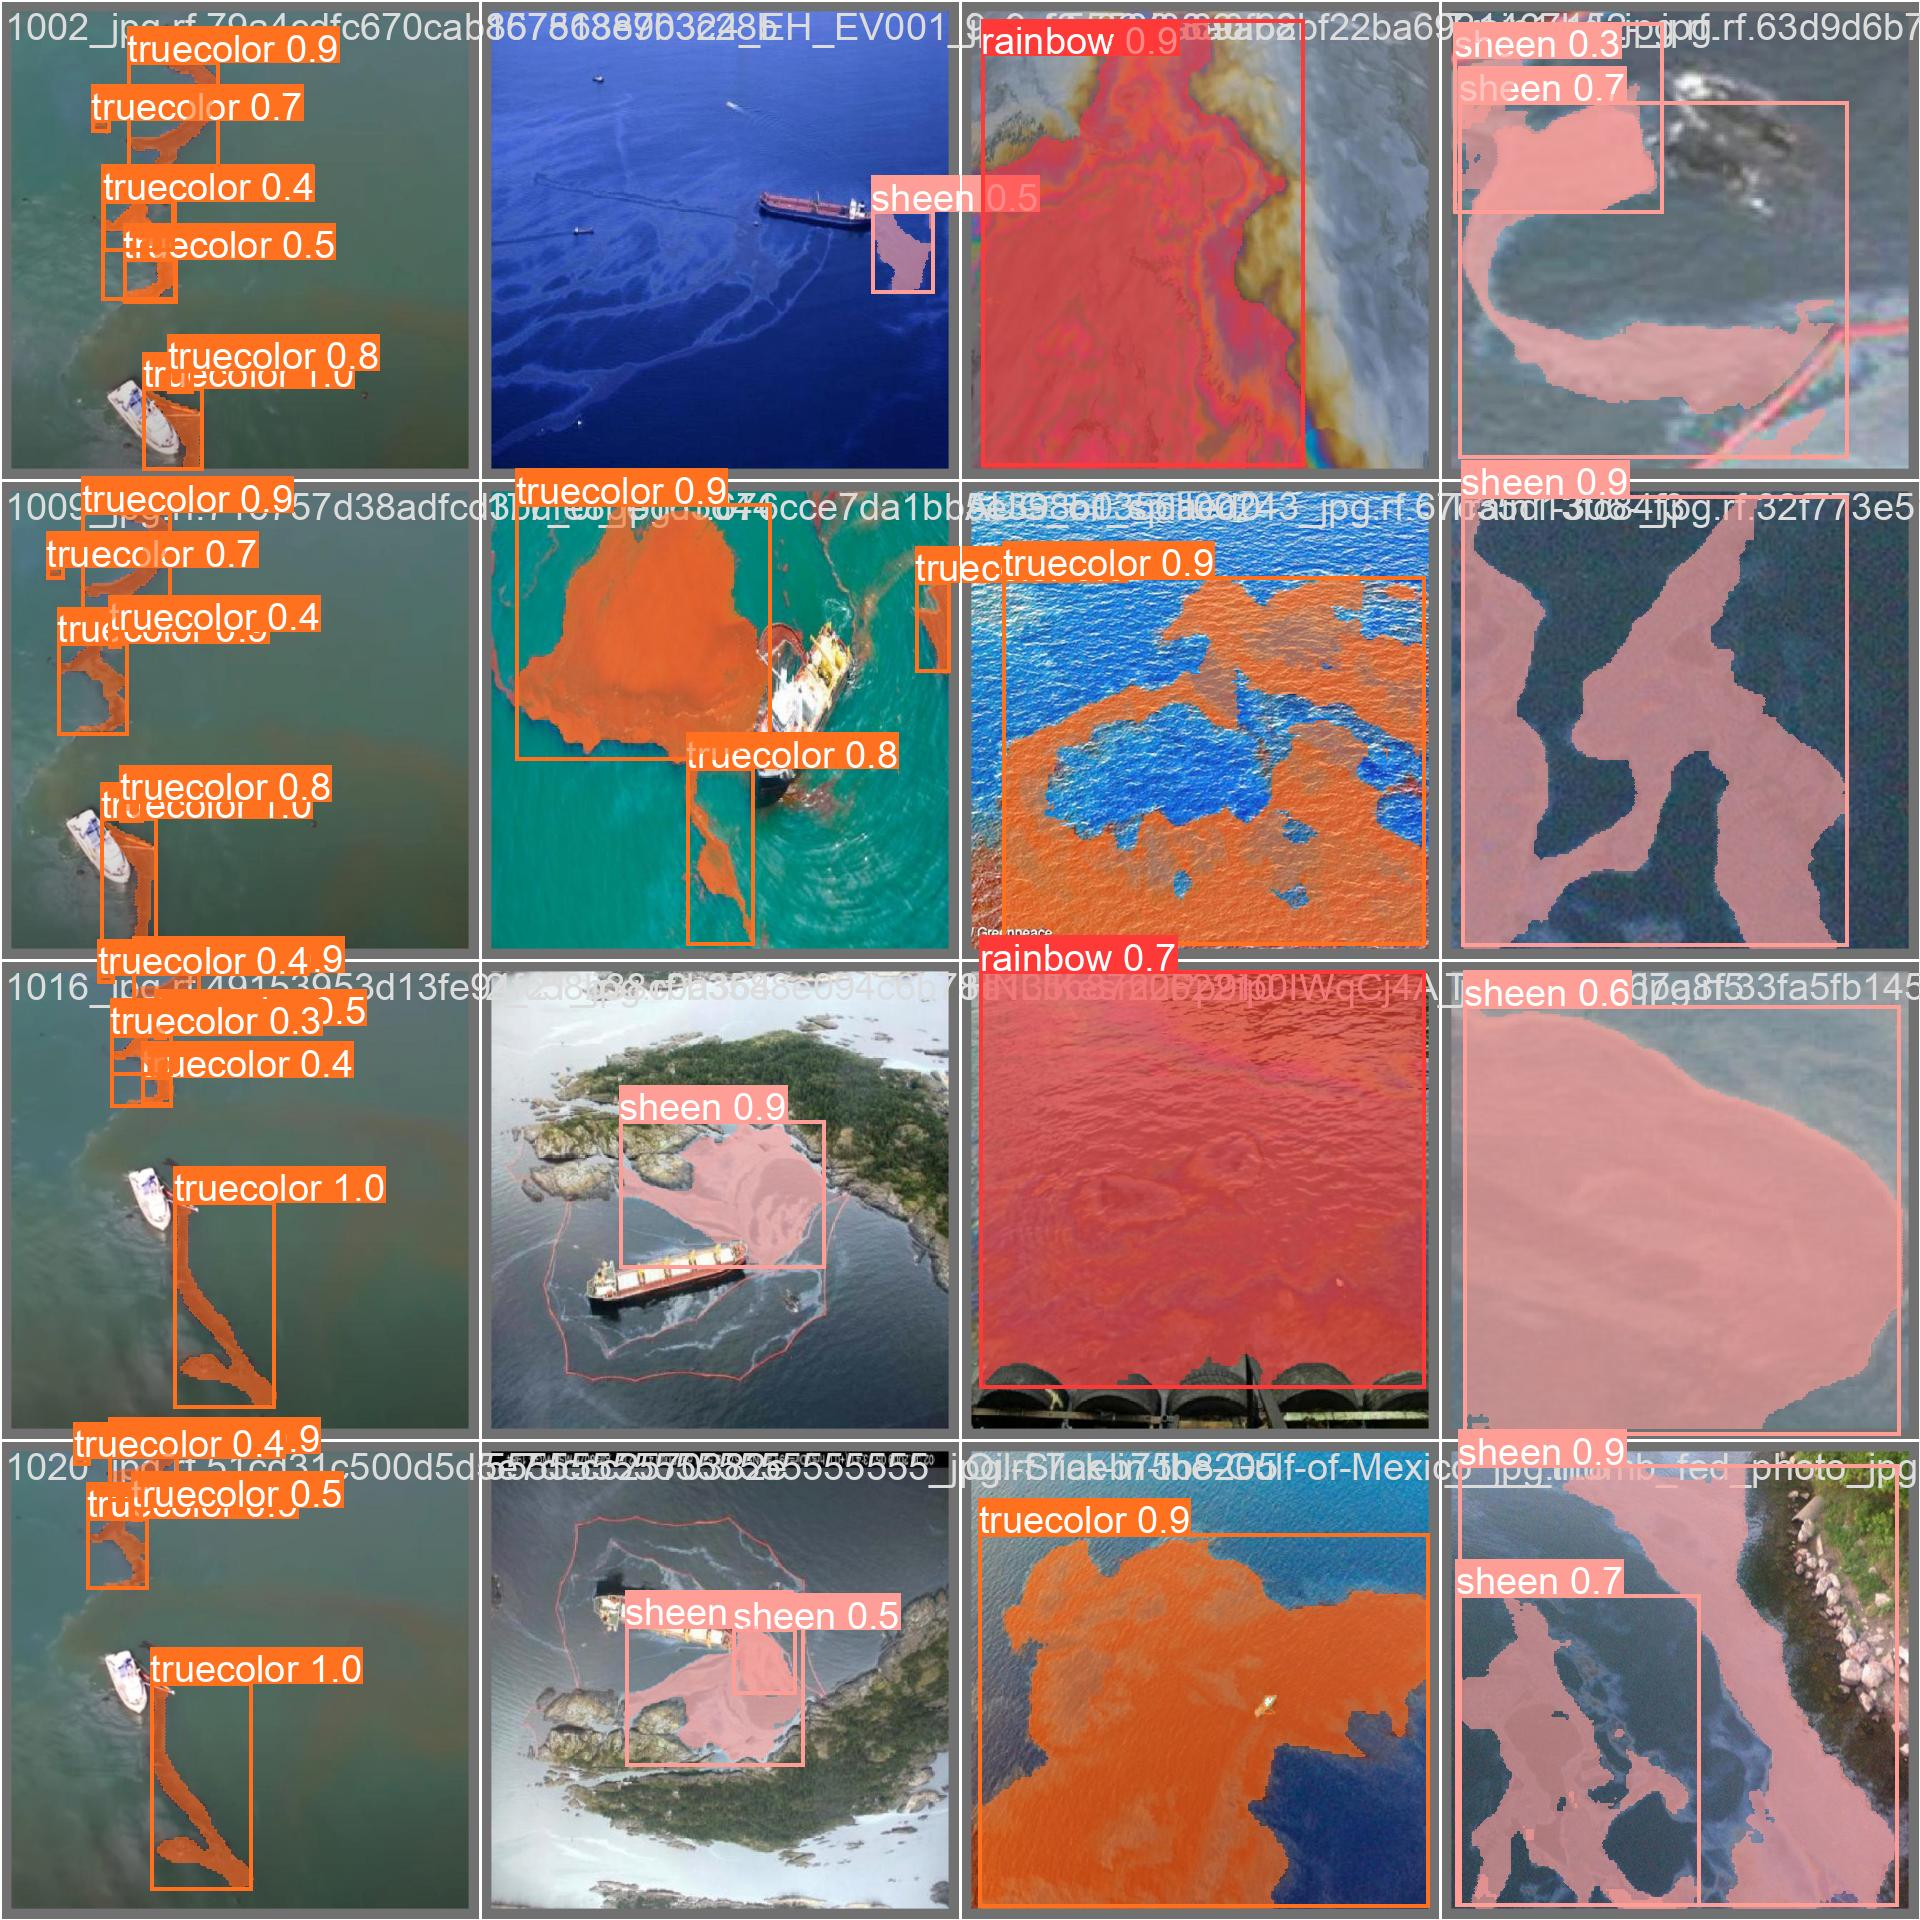

In [ ]:
# %cd {HOME}
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=800)

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:527: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:527: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/oil-spill-in-water.1679657703.jpg save=true


/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:527: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!zip -r export.zip /content/runs/segment/train/weights/best.pt

  adding: content/runs/segment/train/weights/best.pt (deflated 8%)


In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import display, Image

# Load the trained model
model = YOLO("/content/runs/segment/train/weights/best.pt")  # Replace with actual path to your best.pt file

# Define the input source (image, video, directory)
source = "/oil-spill-in-water.1679657703.jpg"  # Replace with actual test image or video

# Run inference (prediction)
results = model(source, conf=0.25, save=True)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

image 1/1 /oil-spill-in-water.1679657703.jpg: 448x640 1 rainbow, 49.5ms
Speed: 3.1ms preprocess, 49.5ms inference, 153.7ms postprocess per imag